In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [2]:
# read data

df = pd.read_excel('Data_Train.xlsx', engine='openpyxl')
pd.set_option('display.max_columns', None)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
for i in df.columns:
    if df[i].dtype=='O':
        print(df[i].value_counts())
        print('_'*25)

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
_________________________
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019

In [6]:
# extracting hour and minutes from departure time and arrival time

df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute

df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [7]:
# extracting date and month from date of journey

df['Date'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Month'] = pd.to_datetime(df['Date_of_Journey']).dt.month

In [8]:
# retriving hours and minutes from duration

duration = list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

df['Duration_Hours'] = duration_hours
df['Duration_Mins'] = duration_mins

In [9]:
# getting day name from date

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Weekday'] = df[['Date_of_Journey']].apply(
    lambda x: dt.datetime.strftime(x['Date_of_Journey'], '%A'), axis=1)

In [10]:
df.describe()

,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Date,Month,Duration_Hours,Duration_Mins
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.490686,24.411214,13.348778,24.690630,12.682205,5.534775,10.246092,28.327717
std,4611.359167,5.748650,18.767980,6.859125,16.506036,8.803701,2.987489,8.495414,16.945400
min,1759.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,5277.000000,8.000000,5.000000,8.000000,10.000000,5.000000,3.000000,2.000000,15.000000
50%,8372.000000,11.000000,25.000000,14.000000,25.000000,6.000000,5.000000,8.000000,30.000000
75%,12373.000000,18.000000,40.000000,19.000000,35.000000,21.000000,6.000000,15.000000,45.000000
max,79512.000000,23.000000,55.000000,23.000000,55.000000,27.000000,12.000000,47.000000,55.000000


In [11]:
# removing truejet as it is not in our test data
df=df[~(df['Airline']=='Trujet')]

In [12]:
# to get the different day time parts


def day_part(i):
    if (i >= 4) and (i < 8):
        return 'Early Morning'
    elif (i >= 8) and (i < 12):
        return 'Morning'
    elif (i >= 12) and (i < 16):
        return 'Noon/Afternoon'
    elif (i >= 16) and (i < 20):
        return 'Evening'
    elif (i >= 20) and (i <= 24):
        return 'Night'
    elif (i > 24) and (i < 4):
        return 'Latenight'


df['day/night'] = df['Dep_Hour'].apply(day_part)

In [13]:
numerical=[feature for feature in df.columns if df[feature].dtype!='O']
categorical=[feature for feature in df.columns if df[feature].dtype=='O']

In [14]:
print(numerical)
print(categorical)

['Date_of_Journey', 'Price', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Date', 'Month', 'Duration_Hours', 'Duration_Mins']
['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Weekday', 'day/night']


In [15]:
df[df['Dep_Hour'] == 0]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Date,Month,Duration_Hours,Duration_Mins,Weekday,day/night
161,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,00:40,03:25,2h 45m,non-stop,No info,4777,0,40,3,25,24,3,2,45,Sunday,None
210,IndiGo,2019-12-05,Banglore,Delhi,BLR → DEL,00:30,03:25,2h 55m,non-stop,No info,3943,0,30,3,25,5,12,2,55,Thursday,None
855,IndiGo,2019-06-06,Banglore,Delhi,BLR → DEL,00:25,03:15,2h 50m,non-stop,No info,3943,0,25,3,15,6,6,2,50,Thursday,None
860,IndiGo,2019-03-03,Banglore,New Delhi,BLR → DEL,00:40,03:25,2h 45m,non-stop,No info,6144,0,40,3,25,3,3,2,45,Sunday,None
980,Air India,2019-12-03,Banglore,New Delhi,BLR → AMD → DEL,00:30,08:45,8h 15m,1 stop,No info,13492,0,30,8,45,3,12,8,15,Tuesday,None
1806,Multiple carriers,2019-09-03,Delhi,Cochin,DEL → BOM → COK,00:20,07:40,7h 20m,1 stop,In-flight meal not included,13977,0,20,7,40,3,9,7,20,Tuesday,None
2079,Air India,2019-01-03,Banglore,New Delhi,BLR → AMD → DEL,00:30,20:30,20h,1 stop,1 Long layover,14752,0,30,20,30,3,1,20,0,Thursday,None
2275,Air India,2019-03-03,Banglore,New Delhi,BLR → AMD → DEL,00:30,08:45,8h 15m,1 stop,No info,11392,0,30,8,45,3,3,8,15,Sunday,None
2481,Air India,2019-01-03,Banglore,New Delhi,BLR → AMD → DEL,00:30,23:55,23h 25m,1 stop,1 Long layover,12599,0,30,23,55,3,1,23,25,Thursday,None
2605,IndiGo,2019-06-21,Banglore,Delhi,BLR → DEL,00:25,03:15,2h 50m,non-stop,No info,3419,0,25,3,15,21,6,2,50,Friday,None


In [16]:
df[df['Airline'] == 'Vistara Premium economy']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Date,Month,Duration_Hours,Duration_Mins,Weekday,day/night
426,Vistara Premium economy,2019-03-03,Banglore,New Delhi,BLR → DEL,16:00,18:35,2h 35m,non-stop,No info,11793,16,0,18,35,3,3,2,35,Sunday,Evening
7657,Vistara Premium economy,2019-01-03,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,9125,7,5,9,20,3,1,2,15,Thursday,Early Morning
8615,Vistara Premium economy,2019-06-04,Banglore,Delhi,BLR → DEL,11:30,14:20,2h 50m,non-stop,No info,5969,11,30,14,20,4,6,2,50,Tuesday,Morning


In [17]:
# more than 24 hours to travel within India

df[df['Duration_Hours'] > 24]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Date,Month,Duration_Hours,Duration_Mins,Weekday,day/night
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,8,55,10,25,3,12,25,30,Tuesday,Morning
15,Air India,2019-03-03,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011,16,40,19,15,3,3,26,35,Sunday,Evening
51,Jet Airways,2019-01-05,Kolkata,Banglore,CCU → DEL → BLR,09:35,10:55 02 May,25h 20m,1 stop,No info,12121,9,35,10,55,5,1,25,20,Saturday,Morning
59,Vistara,2019-06-03,Mumbai,Hyderabad,BOM → DEL → HYD,15:40,16:45 07 Mar,25h 5m,1 stop,No info,12395,15,40,16,45,3,6,25,5,Monday,Noon/Afternoon
61,Air India,2019-03-04,Delhi,Cochin,DEL → MAA → COK,06:05,09:25 04 Apr,27h 20m,1 stop,No info,5117,6,5,9,25,4,3,27,20,Monday,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10634,Jet Airways,2019-06-06,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733,9,40,12,35,6,6,26,55,Thursday,Morning
10639,Air India,2019-03-06,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,05:15,19:15 04 Jun,38h,3 stops,No info,10493,5,15,19,15,6,3,38,0,Wednesday,Early Morning
10642,Air India,2019-05-21,Kolkata,Banglore,CCU → JAI → BOM → BLR,08:20,11:10 22 May,26h 50m,2 stops,No info,11222,8,20,11,10,21,5,26,50,Tuesday,Morning
10648,Air India,2019-01-06,Delhi,Cochin,DEL → CCU → BOM → COK,16:55,19:15 02 Jun,26h 20m,2 stops,No info,13801,16,55,19,15,6,1,26,20,Sunday,Evening


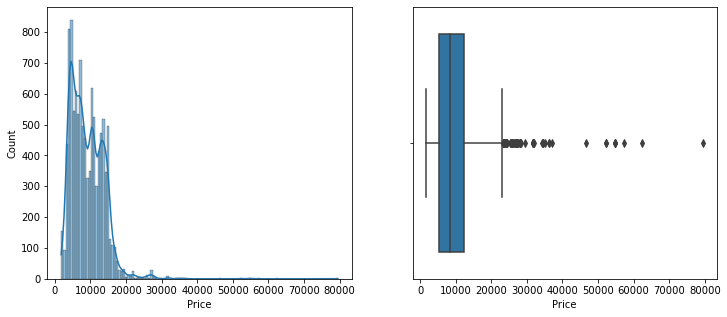

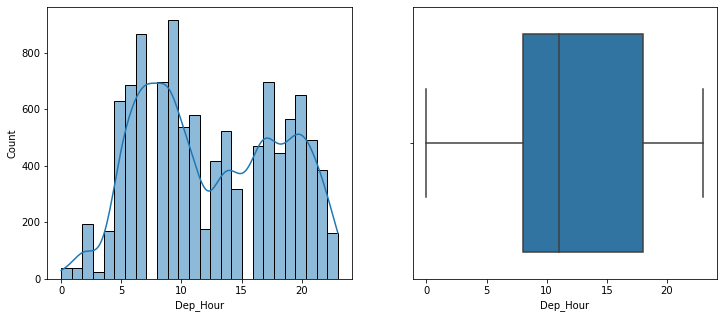

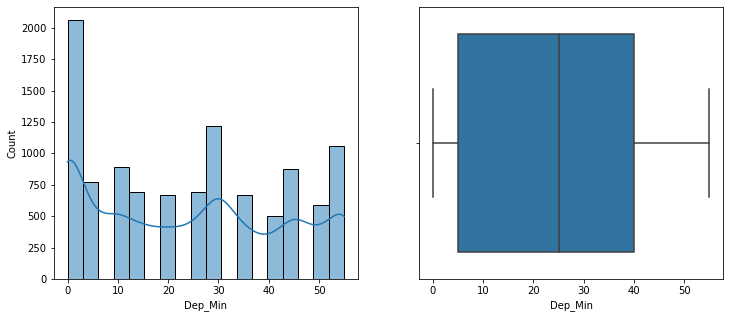

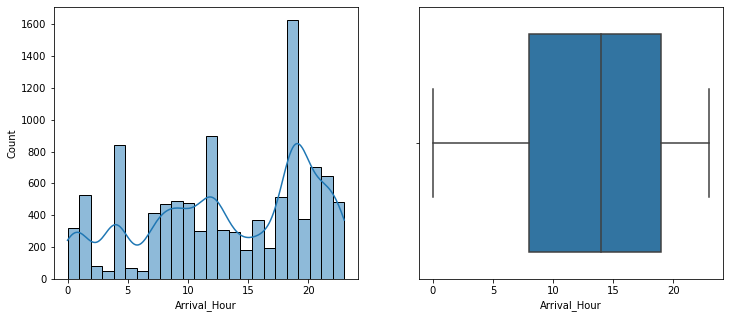

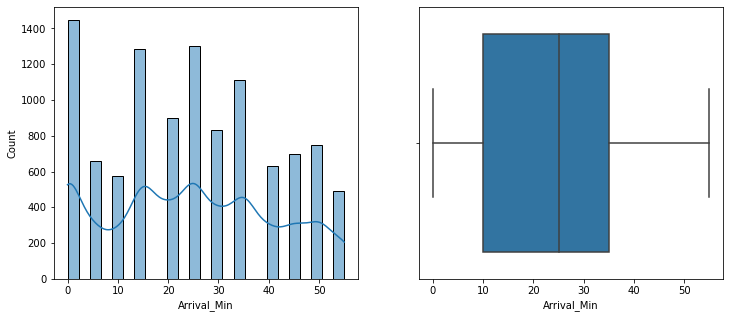

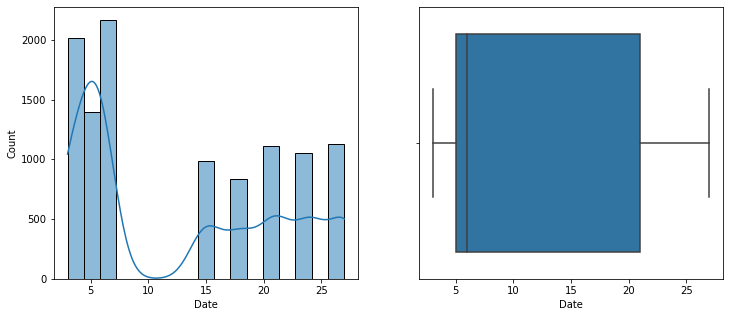

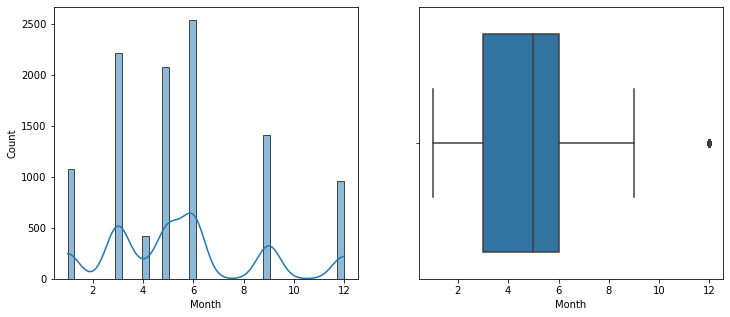

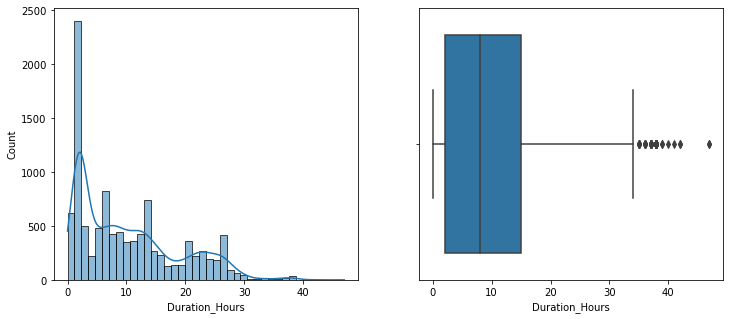

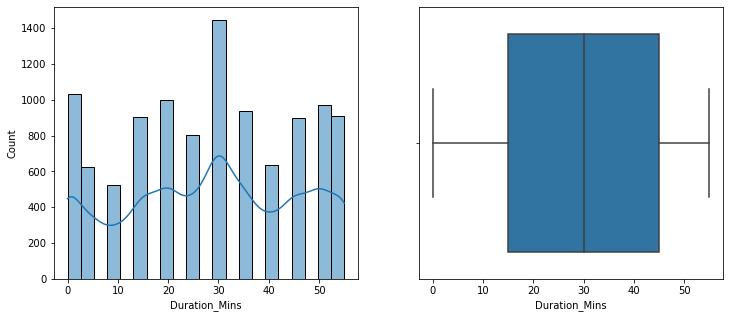

In [18]:
for feature in df[numerical]:
    if feature!='Date_of_Journey':
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        sns.histplot(df[feature],kde=True)
        plt.subplot(1,2,2)
        sns.boxplot(df[feature])

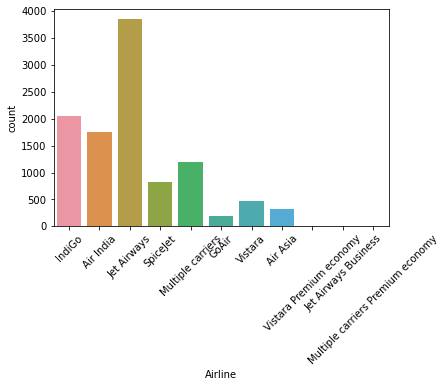

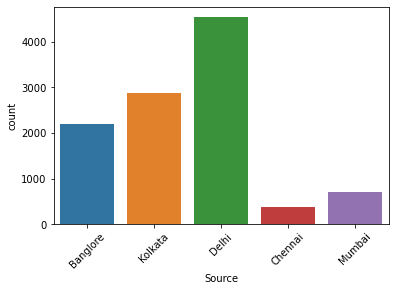

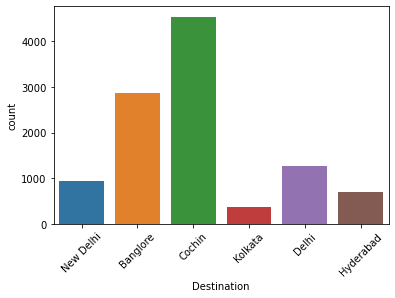

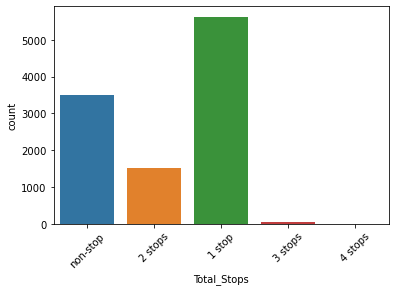

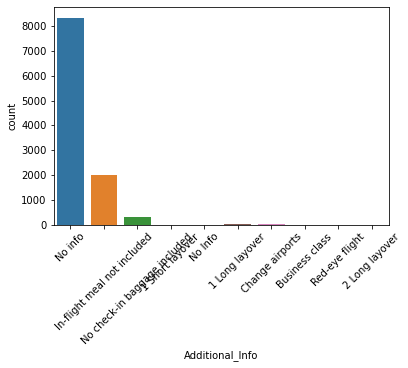

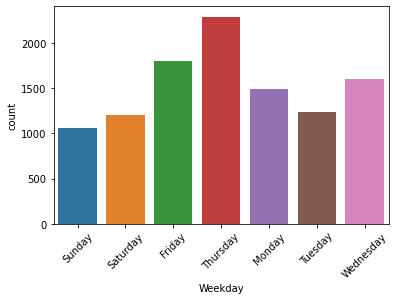

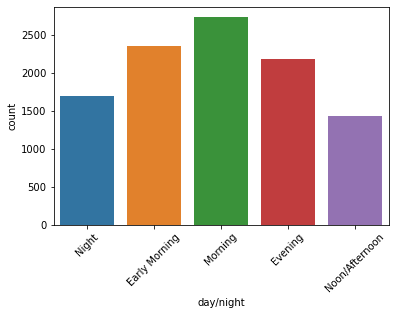

In [19]:
for feature in df[categorical]:
    if feature not in ['Dep_Time','Arrival_Time','Duration','Route']:
        sns.countplot(x=df[feature])
        plt.xticks(rotation=45)
        plt.show()

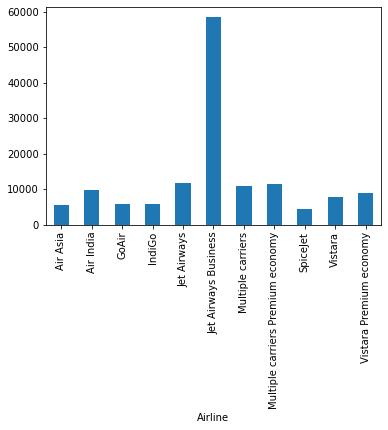

In [20]:
#As usual business class ticket prices are the highest

price = df.groupby(['Airline'])['Price'].mean().plot.bar()
plt.show()

<AxesSubplot:xlabel='Weekday', ylabel='Price'>

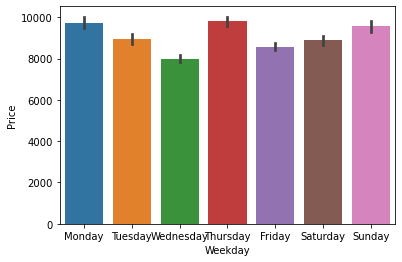

In [21]:
# Monday, Thursday and Sunday has higher prices 
sns.barplot(x=df['Weekday'],y=df['Price'],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

<AxesSubplot:xlabel='day/night', ylabel='Price'>

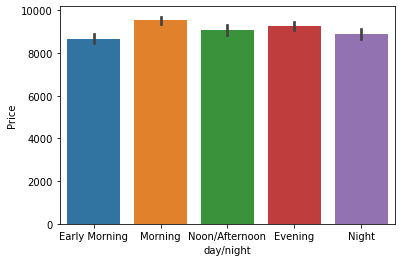

In [22]:
#Not much a difference btw time and price

sns.barplot(x=df['day/night'],y=df['Price'],order=['Early Morning','Morning','Noon/Afternoon','Evening','Night'])

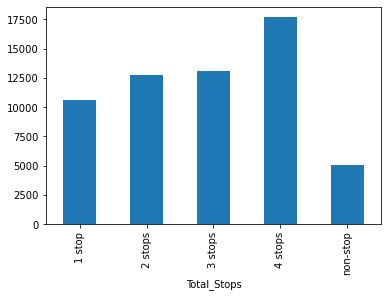

In [23]:
#As stop increases price also increase

stops = df.groupby(['Total_Stops'])['Price'].mean().plot.bar()
plt.show()

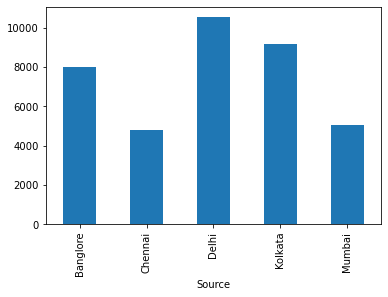

In [24]:
# Delhi prices are the highest and Chennai is the least

source = df.groupby(['Source'])['Price'].mean().plot.bar()
plt.show()

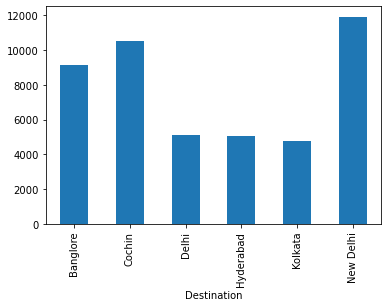

In [25]:
# Delhi prices are the highest followed by Cochin and Banglore

destination = df.groupby(['Destination'])['Price'].mean().plot.bar()
plt.show()

In [26]:
df[df['Airline'] == 'Jet Airways Business']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Date,Month,Duration_Hours,Duration_Mins,Weekday,day/night
657,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229,5,45,10,45,3,1,5,0,Thursday,Early Morning
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,5,45,11,25,3,1,5,40,Thursday,Early Morning
5372,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,5,45,12,25,3,1,6,40,Thursday,Early Morning
7351,Jet Airways Business,2019-03-03,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490,20,5,4,25,3,3,8,20,Sunday,Night
9715,Jet Airways Business,2019-06-03,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285,20,5,4,25,3,6,8,20,Monday,Night
10364,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,9,45,14,25,3,1,4,40,Thursday,Morning


In [27]:
df[df['Duration_Hours'] == 0]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Date,Month,Duration_Hours,Duration_Mins,Weekday,day/night
6474,Air India,2019-06-03,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327,16,50,16,55,3,6,0,5,Monday,Evening


In [28]:
df.drop([6474], inplace=True)

In [29]:
df[df['Arrival_Hour'] == 0]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Date,Month,Duration_Hours,Duration_Mins,Weekday,day/night
53,IndiGo,2019-06-18,Banglore,Delhi,BLR → DEL,21:15,00:15 19 Jun,3h,non-stop,No info,3943,21,15,0,15,18,6,3,0,Tuesday,Night
144,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → HYD → COK,13:05,00:55 22 May,11h 50m,1 stop,No info,9486,13,5,0,55,21,5,11,50,Tuesday,Noon/Afternoon
150,SpiceJet,2019-03-04,Kolkata,Banglore,CCU → BLR,22:20,00:40 04 Apr,2h 20m,non-stop,No info,3873,22,20,0,40,4,3,2,20,Monday,Night
284,IndiGo,2019-06-05,Kolkata,Banglore,CCU → BLR,21:25,00:05 07 May,2h 40m,non-stop,No info,4804,21,25,0,5,5,6,2,40,Wednesday,Night
294,IndiGo,2019-05-18,Kolkata,Banglore,CCU → BLR,21:25,00:05 19 May,2h 40m,non-stop,No info,4804,21,25,0,5,18,5,2,40,Saturday,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,SpiceJet,2019-04-27,Kolkata,Banglore,CCU → BLR,22:20,00:40 28 Apr,2h 20m,non-stop,No check-in baggage included,3841,22,20,0,40,27,4,2,20,Saturday,Night
10569,SpiceJet,2019-03-06,Kolkata,Banglore,CCU → BLR,22:20,00:40 04 Jun,2h 20m,non-stop,No info,3873,22,20,0,40,6,3,2,20,Wednesday,Night
10621,IndiGo,2019-06-27,Kolkata,Banglore,CCU → BLR,22:15,00:50 28 Jun,2h 35m,non-stop,No info,4804,22,15,0,50,27,6,2,35,Thursday,Night
10649,IndiGo,2019-01-03,Kolkata,Banglore,CCU → BLR,21:25,00:05 02 Mar,2h 40m,non-stop,No info,4778,21,25,0,5,3,1,2,40,Thursday,Night


In [30]:
df[df['Total_Stops'] == '4 stops']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Date,Month,Duration_Hours,Duration_Mins,Weekday,day/night
9182,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4 stops,Change airports,17686,5,50,11,20,3,1,29,30,Thursday,Early Morning


In [31]:
# removing ouliers

for feature in df[['Duration_Hours', 'Price']]:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower = df[feature].quantile(0.25) - (IQR * 1.5)
    upper = df[feature].quantile(0.75) + (IQR * 1.5)
    print(feature, lower, upper)
    df.loc[df[feature] <= lower, feature] = lower
    df.loc[df[feature] >= upper, feature] = upper

Duration_Hours -17.5 34.5
Price -5367.0 23017.0


In [32]:
# replacing hours more than 24
time=[]
for k,v in enumerate(range(24,50)):
    time.append([v,k])

time=dict(time)
time.pop(24)
time

df=df.copy()
df['Duration_Hours']=df['Duration_Hours'].replace(time)

In [33]:
df['Total_Stops'].fillna('non-stop', inplace=True)

In [34]:
# replacing and encoding few features

df['Destination'][df['Destination'] == 'New Delhi'] = 'Delhi'

df['Weekday'] = df['Weekday'].map({
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
})

df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})

df['day/night'] = df['day/night'].map({
    'Early Morning': 1,
    'Morning': 2,
    'Noon/Afternoon': 3,
    'Evening': 4,
    'Night': 5,
    'Late Night': 6
})

In [35]:
df[df['day/night'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Date,Month,Duration_Hours,Duration_Mins,Weekday,day/night
86,IndiGo,2019-06-24,Delhi,Cochin,DEL → MAA → COK,02:00,07:25,5h 25m,1,No info,5636,2,0,7,25,24,6,5.0,25,1,NaN
91,Multiple carriers,2019-06-03,Delhi,Cochin,DEL → BOM → COK,02:15,13:20,11h 5m,1,No info,17057,2,15,13,20,3,6,11.0,5,1,NaN
142,IndiGo,2019-06-15,Delhi,Cochin,DEL → MAA → COK,02:00,07:25,5h 25m,1,No info,5636,2,0,7,25,15,6,5.0,25,6,NaN
159,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,02:15,04:25 07 Mar,26h 10m,1,No info,17024,2,15,4,25,3,6,2.0,10,1,NaN
161,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,00:40,03:25,2h 45m,0,No info,4777,0,40,3,25,24,3,2.0,45,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10579,Multiple carriers,2019-03-03,Delhi,Cochin,DEL → BOM → COK,02:15,11:30,9h 15m,1,No info,17057,2,15,11,30,3,3,9.0,15,7,NaN
10603,IndiGo,2019-09-06,Delhi,Cochin,DEL → MAA → COK,02:00,07:25,5h 25m,1,No info,5636,2,0,7,25,6,9,5.0,25,5,NaN
10617,IndiGo,2019-05-27,Mumbai,Hyderabad,BOM → HYD,02:35,04:05,1h 30m,0,No info,2754,2,35,4,5,27,5,1.0,30,1,NaN
10631,IndiGo,2019-05-15,Delhi,Cochin,DEL → BLR → COK,02:00,07:45,5h 45m,1,No info,6037,2,0,7,45,15,5,5.0,45,3,NaN


In [36]:
df['day/night'] = df['day/night'].fillna(6)

In [37]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Date,Month,Duration_Hours,Duration_Mins,Weekday,day/night
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,22,20,1,10,24,3,2.0,50,7,5.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,50,13,15,5,1,7.0,25,6,1.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,25,4,25,6,9,19.0,0,5,2.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,18,5,23,30,5,12,5.0,25,4,4.0
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,16,50,21,35,3,1,4.0,45,4,4.0


<AxesSubplot:>

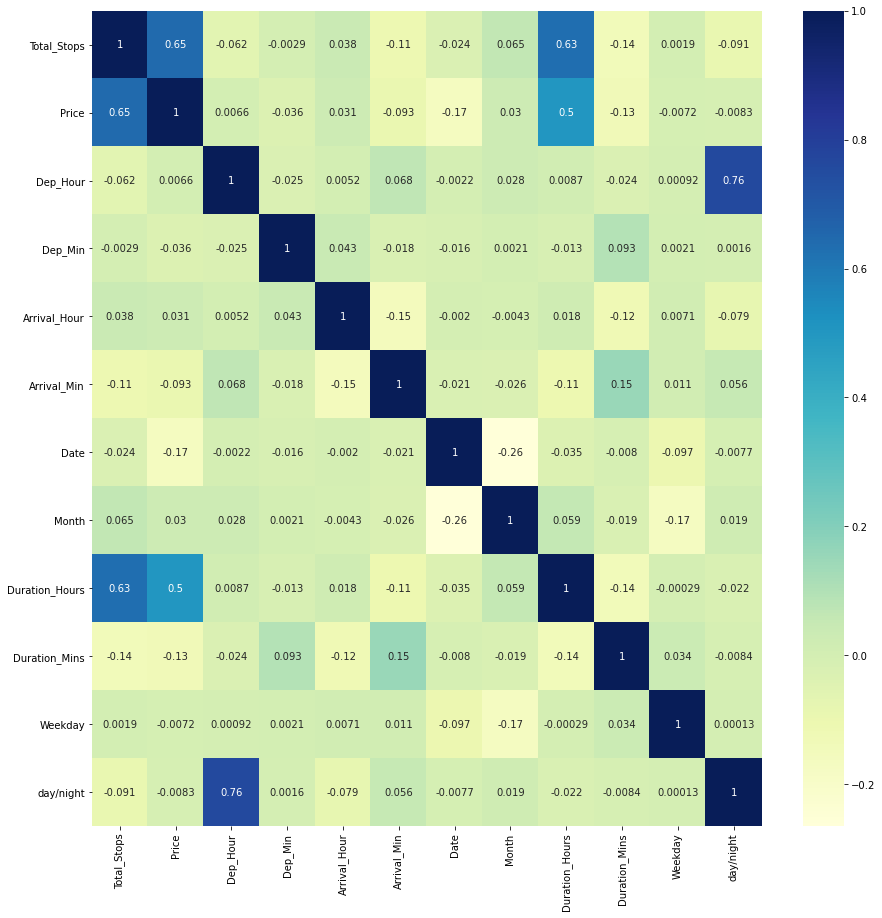

In [38]:
# finding correlation btw features

plt.figure(figsize=(15, 15))
cor = df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)

In [39]:
# removing correlated features

def correlation(df,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return list(col_corr)

correlation(df,.80)

[]

In [40]:
# removing unwanted columns

df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [41]:
# saving the data

df.to_csv('preprocessed_train.csv',index=None)